### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [2]:
lista_alumnos = [("Caranchoa", 24, 1.82), 
                 ("Leo Messi", 25, 1.71), 
                 ("El bicho", 35, 1.66), 
                 ("Paquirrin", 37, 1.63), 
                 ("John Cobra", 29, 1.90), 
                 ("El tomate", 27, 1.80), 
                 ("El chucky de cieza", 28, 1.70), 
                 ("Chiquito de la Calzada", 32, 1.60), 
                 ("El cuñao", 36, 1.74), 
                 ("Rafa Nadal", 45, 1.72), 
                 ("Pau Gasol", 41, 1.65), 
                 ("El hermano de Pau Gasol", 30, 1.65), 
                 ("Joselito", 40, 1.60), 
                 ("Maria Isabel", 39, 1.80), 
                 ("Melody", 23, 1.77), 
                 ("Las ketchup", 32, 1.75), 
                 ("Pumuki", 27, 1.70), 
                 ("Naranjito", 34, 1.80), 
                 ("Espinete", 27, 1.77), 
                 ("El Feli", 28, 1.70), 
                 ("Jose Luis", 35, 1.80)] 

In [3]:
import pandas as pd

In [4]:
# Crea el siguiente DataFrame
nombres_df = pd.DataFrame(lista_alumnos)
nombres_df = nombres_df.rename(columns = {0: "Nombre", 1: "Edad", 2: "Altura"})
nombres_df

,Nombre,Edad,Altura
0,Caranchoa,24,1.82
1,Leo Messi,25,1.71
2,El bicho,35,1.66
3,Paquirrin,37,1.63
4,John Cobra,29,1.90
5,El tomate,27,1.80
6,El chucky de cieza,28,1.70
7,Chiquito de la Calzada,32,1.60
8,El cuñao,36,1.74
9,Rafa Nadal,45,1.72


In [5]:
# Muestra la info
nombres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [6]:
# Muestra los estadísticos del df
nombres_df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


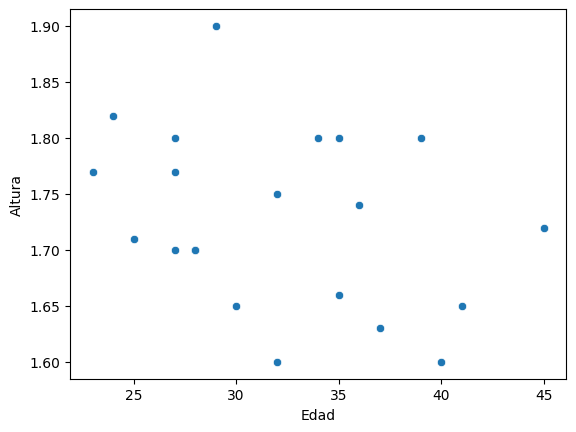

In [7]:
# Genera un scatter plot con Edad y Altura
import seaborn as sns

sns.scatterplot(x = nombres_df.loc[:,"Edad"], y = nombres_df.loc[:, "Altura"]);

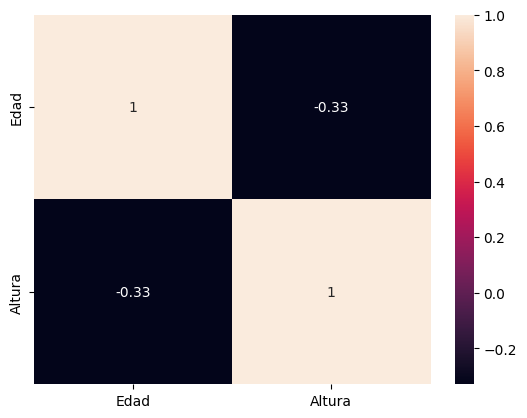

In [8]:
# Genera un heatmap
sns.heatmap(nombres_df.iloc[:, 1: ].corr(), annot=True);

C:\Users\Marta\AppData\Local\Temp\ipykernel_5772\1382192142.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres_df["Altura"]);


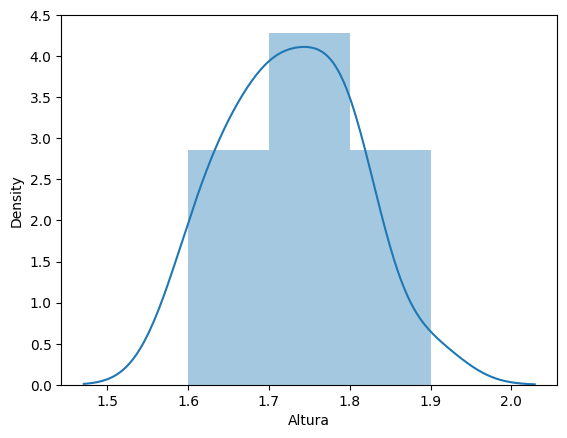

In [35]:
# Genera un distplot
sns.distplot(nombres_df["Altura"]);

In [10]:
# Divide el df en features (X) y target (y)
X = nombres_df[["Edad"]]
X

,Edad
0,24
1,25
2,35
3,37
4,29
5,27
6,28
7,32
8,36
9,45


In [11]:
y = nombres_df["Altura"]
y

0     1.82
1     1.71
2     1.66
3     1.63
4     1.90
5     1.80
6     1.70
7     1.60
8     1.74
9     1.72
10    1.65
11    1.65
12    1.60
13    1.80
14    1.77
15    1.75
16    1.70
17    1.80
18    1.77
19    1.70
20    1.80
Name: Altura, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjunto de entrenamiento y test
# Siendo el tamaño del conjunto test un 30% y la semilla sea 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [13]:
# Muestra el tamaño de X, X_train, y_train, X_test e y_test
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14,)
Test features shape: (7, 1)
Test target shape: (7,)


In [14]:
# Instancia y entrena un regresor lineal
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
# imprime el intercepto y el coeficiente
print(lm.intercept_)
print(lm.coef_)

1.8520906282183314
[-0.00414006]


(Altura) = 1.85 - 0.0041*(Edad)

In [16]:
# Realiza una predicción con el conjunto de test
predictions = lm.predict(X_test)
predictions

array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

In [17]:
# Crea un df con el conjunto de test
# df_test
df_test = pd.DataFrame(X_test)
df_test

,Edad
0,24
17,34
15,32
1,25
8,36
5,27
11,30


In [18]:
# Añade una columna con la predicción
df_test["Predicción"] = predictions
df_test

,Edad,Predicción
0,24,1.752729
17,34,1.711329
15,32,1.719609
1,25,1.748589
8,36,1.703048
5,27,1.740309
11,30,1.727889


In [19]:
# Añade una columna con la altura real
df_test["Altura real"] = y_test
df_test

,Edad,Predicción,Altura real
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


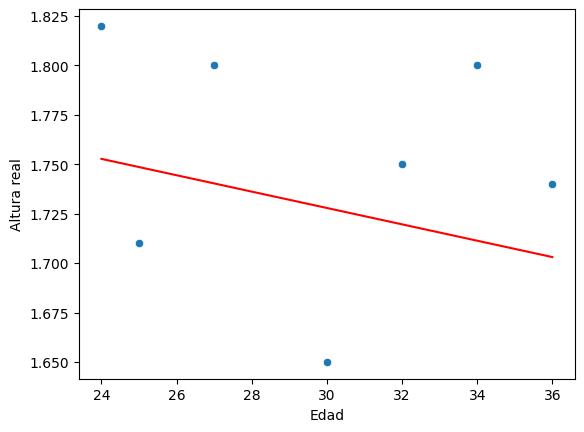

In [20]:
# Crea un plot con los datos reales y la predicción
sns.scatterplot(x = df_test["Edad"], y = df_test["Altura real"]);
sns.lineplot(x = df_test["Edad"], y = df_test["Predicción"], color = "red");

In [21]:
# Muestra el score del módelo
from sklearn import metrics

lm.score(X_test, y_test)

-0.19742015635643928

In [22]:
df_test

,Edad,Predicción,Altura real
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


In [23]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [24]:
# Muestra el Mean Absolute Error, el Mean Squared Error y el Root Mean Squared Error
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306


In [25]:
# Muestra el Mean Absolute Percentage Error
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAPE: 0.03253724207144201


In [26]:
# Muestra cual sería la predicción para 85 años de edad
#(Altura) = 1.85 - 0.0041*(Edad)

1.85 - 0.0041*85

1.5015

In [27]:
# Ahora vamos a calcular el MAE, MSE, RMSE y MAPE a mano

MAE =sum(np.abs(df_test["Predicción"] - df_test["Altura real"]))/len(df_test["Predicción"])
print('MAE:', MAE)

MSE = sum((df_test["Altura real"] - df_test["Predicción"])**2)/len(df_test["Predicción"])
print('MSE:', MSE)

RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

MAPE = sum(np.abs((df_test["Predicción"] - df_test["Altura real"])/df_test["Altura real"]))/len(df_test["Predicción"])
print('MAPE:', MAPE)

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306
MAPE: 0.03253724207144201


In [28]:
# Añade una columna con el error
df_test["Error"] = df_test["Altura real"] - df_test["Predicción"]
df_test

,Edad,Predicción,Altura real,Error
0,24,1.752729,1.82,0.067271
17,34,1.711329,1.80,0.088671
15,32,1.719609,1.75,0.030391
1,25,1.748589,1.71,-0.038589
8,36,1.703048,1.74,0.036952
5,27,1.740309,1.80,0.059691
11,30,1.727889,1.65,-0.077889


In [29]:
# Muestra el error medio
MAE

0.05706488156539665

In [30]:
# Añade una columna que contenga el error cuadrático
df_test["Error cuadrático"] = df_test["Error"]**2
df_test

,Edad,Predicción,Altura real,Error,Error cuadrático
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,-0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,-0.077889,0.006067


In [31]:
# Muestra el error cuadrático medio
MSE

0.0036851216240520687

In [32]:
# Muestra la raíz del error cuadrático medio
print(RMSE)

0.060705202611078306


In [33]:
# Muestra el error absoluto medio porcentual
MAPE

0.03253724207144201